#### Step 1: Import Necessary Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import PROCESSED_FEATURES_FILE


#### Step 2: Load the Contributions Data

In [41]:
# Replace 'path_to_your_parquet_file.parquet' with the actual file path
contributions_df = pd.read_parquet(PROCESSED_FEATURES_FILE)

# Optional: Preview the first few rows
contributions_df.head()


,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,editor_used,area_delta,...,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism
0,2377515,0.0,0.0,0.0,0.0,0.0,0.0,0.014612,iD 1.5.4,-597,...,0,0,0,0,0,0,0,0,0,True
1,2377515,0.0,0.0,0.0,0.0,0.0,0.0,0.014612,iD 1.5.4,-661,...,0,0,0,0,0,0,0,0,0,True
2,6335199,0.0,0.0,0.0,0.0,0.0,0.0,0.054795,iD 2.5.1,-6351,...,0,0,0,0,0,1,0,0,0,True
3,5193146,0.0,0.0,0.0,0.0,0.0,0.0,0.091781,JOSM,-60560,...,0,0,0,0,0,0,1,0,0,True
4,3149129,0.0,0.0,0.0,0.0,0.0,0.0,1.731050,JOSM,-47,...,0,0,0,0,0,0,0,0,0,True


In [42]:
# Outlier Changeset ID
contributions_df[contributions_df['changeset_id'] == 21643875]

,user_id,edit_frequency_7d,edit_frequency_14d,edit_frequency_30d,edit_frequency_60d,edit_frequency_180d,edit_frequency_365d,edit_frequency_all,editor_used,area_delta,...,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism
4482,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,1,0,0,0,0,0,True
4483,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,1,0,0,0,0,0,True
4484,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,1,0,0,0,0,0,True
4485,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,1,0,0,0,0,0,True
4486,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,1,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460877,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,0,0,0,0,0,0,True
460878,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,0,0,0,0,0,0,True
460879,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,0,0,0,0,0,0,True
460880,1942179,0.0,0.0,0.0,0.0,0.0,0.0,17.530594,,0,...,0,0,0,0,0,0,0,0,0,True


#### Step 3: Compute the Number of Contributions per Changeset

In [51]:
# Group by 'changeset_id' and count the number of contributions
contributions_per_changeset = contributions_df.groupby('changeset_id').size().reset_index(name='num_contributions')

# Preview the result
contributions_per_changeset = contributions_per_changeset.sort_values(by='num_contributions', ascending=False)

contributions_per_changeset.head(100)


,changeset_id,num_contributions
416,21643875,29856
4023,36764824,25372
5828,42880693,15290
812,24150516,10357
6081,43879514,9213
...,...,...
61,19976296,409
10841,55703130,408
5325,41219347,407
411,21612839,406


#### Step 4: Calculate Statistical Measures

In [44]:
# Calculate statistics
mean_contributions = contributions_per_changeset['num_contributions'].mean()
median_contributions = contributions_per_changeset['num_contributions'].median()
std_contributions = contributions_per_changeset['num_contributions'].std()
max_contributions = contributions_per_changeset['num_contributions'].max()
min_contributions = contributions_per_changeset['num_contributions'].min()
quantiles = contributions_per_changeset['num_contributions'].quantile([0.25, 0.5, 0.75])

# Print statistics
print(f"Mean number of contributions per changeset: {mean_contributions:.2f}")
print(f"Median number of contributions per changeset: {median_contributions}")
print(f"Standard deviation: {std_contributions:.2f}")
print(f"Minimum contributions in a changeset: {min_contributions}")
print(f"Maximum contributions in a changeset: {max_contributions}")
print("\nQuantiles:")
print(quantiles)


Mean number of contributions per changeset: 26.48
Median number of contributions per changeset: 3.0
Standard deviation: 360.82
Minimum contributions in a changeset: 1
Maximum contributions in a changeset: 29856

Quantiles:
0.25     1.0
0.50     3.0
0.75    11.0
Name: num_contributions, dtype: float64


#### Step 5: Visualize the Distribution

##### A. Histogram

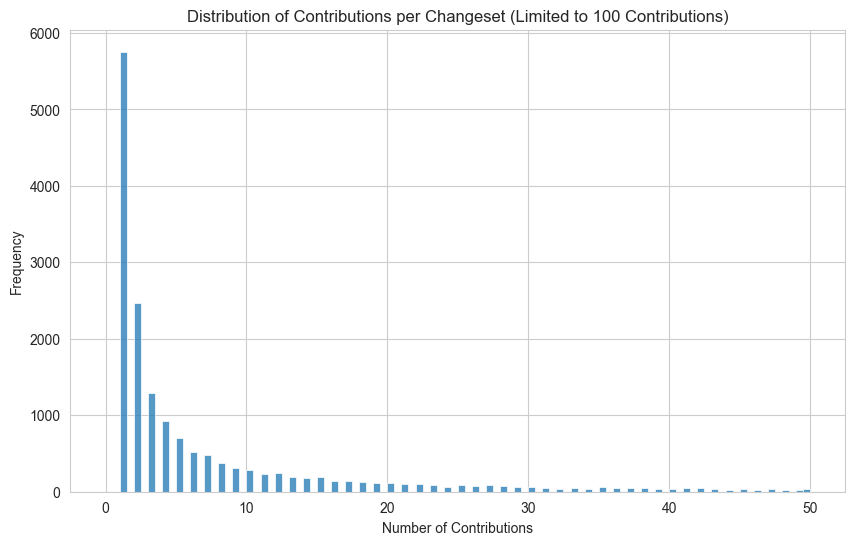

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set maximum x-axis limit to focus on the majority of data
max_contributions_display = 50  # Adjust as needed

plt.figure(figsize=(10, 6))
sns.histplot(
    contributions_per_changeset['num_contributions'],
    bins=100,
    binrange=(0, max_contributions_display),
    kde=False
)
plt.title('Distribution of Contributions per Changeset (Limited to 100 Contributions)')
plt.xlabel('Number of Contributions')
plt.ylabel('Frequency')
plt.show()


##### B. Box Plot

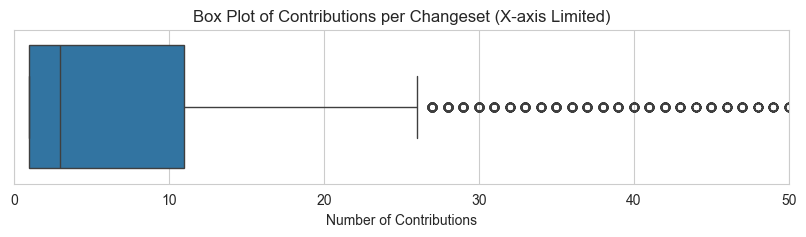

In [46]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=contributions_per_changeset['num_contributions'])
plt.xlim(0, 50)  # Adjust the limit based on your data
plt.title('Box Plot of Contributions per Changeset (X-axis Limited)')
plt.xlabel('Number of Contributions')
plt.show()


##### C. Violin Plot (Optional)